# GX 6004-001:  Applied Data Science (Session 2)

## Hypothesis Testing

One important reason we conduct data analysis is to examine our conjectures about how the world or some system operates.  This may be done explicitly using hypothesis testing or done implicitly when we develop of a statistical model for estimation and prediction.  Implicit in the prediction model is a hypothesis about the stability of relationships through time or through space.  

There is a formalized way to conduct hypothesis testing: a data scientist lays out a conjecture about a system in a formal manner, namely a mutually exclusive and contradictory statement about the value of some parameter from a statistical model that characterizes the conjecture. 

A statistical hypothesis is a claim either about the value of a single population characteristic or about the values of several population characteristics.

## Canonical Example

A canonical example of hypothesis testing is a criminal trial in the **US justice system**.  The hypothesis examined by a jury is one of **'not guilty'** versus **'guilty'**.  Formally, the null hypothesis the jury uses is 'not guilty', and the alternative hypothesis is "guilty".  Only in the face of considerable evidence is the jury to move from the position 'not juilty' to 'juilty'.  When thinking about hypothesis testing, it is useful to keep this example in mind. 

In hypothesis testing, a data scientist formulates the basic proposition in a manner that one claim is initially favored (not guilty) and is rejected only in the face of sample evidence to the contrary (guilty).  The initially-favored claim is typically called the **null hypothesis**, and a data scientist rejects a null hypothesis in favor of the alternative hypothesis only in the face of **considerable evidence** to the contrary.  Otherwise, a data scientist is said to **'fail to reject'** the null hypothesis.

We can write these hypotheses formally as:

$H_0$: Not guilty

$H_1$: Guilty

The jury maintains $H_0$ at the start of the trial.  During the trial, the state (as prosecution) presents evidence to the jury that is meant to change their maintained hypothesis.  It is only in the presence of overwhelming evidence that the jury moves from $H_0$ to $H_1$.  The absence of such evidence, however, does not prompt the jury to drop their maintained hypothesis of 'not guilty'. 

## Two Ingredients and Two Possible Types of Error

### Ingredients
1. A "test statistic" of some type that is only the **function of sample data**.
2. A rejection region, based on a probability value, $\alpha$, which is a set of values for the test statistic for which $H_0$ will be rejected.  

Often we write the test statistic as $\hat\theta$, which is a function only of actual data representing some population characteristic, $\theta$.  As an example, the test statistic may be an average of some data, such as the average value of $x_1$ from our simulated data.  In this case, $\hat\theta=\frac{1}{n}\sum_i{x_i}$

Frequently, we are testing against of conjecture of 0.  For example,

$H_0$: $\theta=0$

$H_1$: $\theta\neq0$

### Potential Errors

There is the truth, **that you do not know**, and the decision **that you must make**.  Accordingly, there are two types of possible error.

Type 1 Error: Rejecting $H_0$ when it is, **in fact**, true.

Type 2 Error: Failing to reject $H_0$ when it is, **in fact**, false.

#### Notes
* Tabulate is not native to Anaconda.
* pip install tabulate.

In [1]:
from tabulate import tabulate

table = [["H0 is:", " ", "  "],
         ["", "True", "False"],
         ["Reject H0", "Type 1 error", " "],
         ["Reject H1", " ", "Type 2 error",]]
print(tabulate(table, tablefmt="fancy_grid", numalign="center"))

╒═══════════╤══════════════╤══════════════╕
│ H0 is:    │              │              │
├───────────┼──────────────┼──────────────┤
│           │ True         │ False        │
├───────────┼──────────────┼──────────────┤
│ Reject H0 │ Type 1 error │              │
├───────────┼──────────────┼──────────────┤
│ Reject H1 │              │ Type 2 error │
╘═══════════╧══════════════╧══════════════╛


In classical hypothesis testing, Pr(Type 1 error) $= \alpha$. 

(Typically, in social sciences, $\alpha$ = 0.05.  There is considerable evidence to suggest it should be much lower, say 0.01.  Why?)

From the **Central Limit Theorem**, we know that test statistics, $\hat\theta$'s, are asymptotically distributed normal with a finite, non-zero variance (discussed below).  Therefore, the normal distribution identifies our rejection regions.  When testing, we "z-normalize" the test statistic.  Namely,

$H_0$ : $\theta=\theta_0$

$H_1$ : $\theta\neq\theta_0$

Z-normalized or t-stat: $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}$

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


/nfshome/ty1045/.conda/envs/myEnv/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
x = np.linspace(-3,3,1000)
pdf = np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

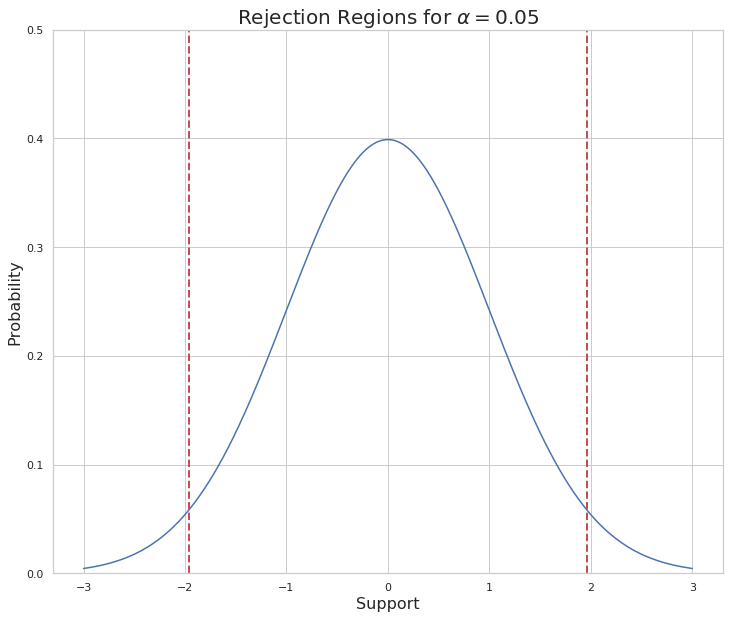

In [4]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title(r'Rejection Regions for $\alpha=0.05$', fontsize = 20)
plt.axvline(-1.96, color='r', ls='--', lw=2.0)
plt.axvline(1.96, color='r', ls='--', lw=2.0)

In [ ]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title(r'Rejection Regions for $\alpha=0.01$', fontsize = 20)
plt.axvline(-2.33, color='r', ls='--', lw=2.0)
plt.axvline(2.33, color='r', ls='--', lw=2.0)

### Equivalent Statements

Consider the following general hypothesis formulation.  

$H_0$ : $\theta=\theta_0$

$H_1$ : $\theta\neq\theta_0$

Let $SE(\hat\theta)$ denote the standard error of the point estimate of $\theta$.  These are equivalent statements.

1.  $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}>\vert1.96\vert$ implies a rejection of $H_0$ at a 95% level of confidence.  
2. $\big\vert$t-stat$\big\vert$ in excess of 1.96 implies $\hat\theta$ is statistically different than $\theta_0$.  (Rule of thumb, greater than 2 in absolute value.)
3. $\hat\theta\pm 1.96\cdot SE(\hat\theta)$ constitutes at 95% confidence interval around $\hat\theta$.  If this interval includes $\theta_0$, fail to reject $H_0$.

### In practice, we let the computer do the heavy lifting.

Let's do several 'toy' examples of testing an average value against a null of zero.

Sample size is $n$.  Standard error of $\mu$ is $\frac{\sigma}{\sqrt{n}}$.

$H_0$ : $\mu=0$

$H_1$ : $\mu\neq0$

#### Notes
* Use a DGP that is Gaussian.
* In turn, use alternative DGPs to examine the principle of hypothesis testing.
* We will examine what happens as we increase the sample size.

In [6]:
import numpy as np
n = 10

random.seed(1999)
normal = np.random.normal(0, 1, n)
print("The mean is %f" % normal.mean())
print("The standard error is %f" % (normal.std()/np.sqrt(n)))
print("The t-statistic is %f" % (normal.mean()/(normal.std()/np.sqrt(n)))) 
print("The confidence interval is %f and %f" % ((normal.mean()-1.96*(normal.std()/np.sqrt(n))), 
      ((normal.mean()+1.96*normal.std()/np.sqrt(n)))))

The mean is 0.179928
The standard error is 0.239459
The t-statistic is 0.751396
The confidence interval is -0.289411 and 0.649268


In [7]:
n = 10

random.seed(1999)
normal = np.random.normal(1, 5, n)
print("The mean is %f" % normal.mean())
print("The standard error is %f" % (normal.std()/np.sqrt(n)))
print("The t-statistic is %f" % (normal.mean()/(normal.std()/np.sqrt(n)))) 
print("The confidence interval is %f and %f" % ((normal.mean()-1.96*(normal.std()/np.sqrt(n))), 
      ((normal.mean()+1.96*normal.std()/np.sqrt(n)))))

The mean is 1.899642
The standard error is 1.197294
The t-statistic is 1.586612
The confidence interval is -0.447055 and 4.246338


In [8]:
n = 10

random.seed(1999)
normal = np.random.normal(3, 1, n)
print("The mean is %f" % normal.mean())
print("The standard error is %f" % (normal.std()/np.sqrt(n)))
print("The t-statistic is %f" % (normal.mean()/(normal.std()/np.sqrt(n)))) 
print("The confidence interval is %f and %f" % ((normal.mean()-1.96*(normal.std()/np.sqrt(n))), 
      ((normal.mean()+1.96*normal.std()/np.sqrt(n)))))

The mean is 3.179928
The standard error is 0.239459
The t-statistic is 13.279646
The confidence interval is 2.710589 and 3.649268


### Equivalent Statements (Again)

Consider the following general hypothesis formulation.  

$H_0$ : $\theta=\theta_0$

$H_1$ : $\theta\neq\theta_0$

Let $SE(\hat\theta)$ denote the standard error of the point estimate of $\theta$.  These are equivalent statements.

1.  $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}>\vert1.96\vert$ implies a rejection of $H_0$ at a 95% level of confidence.  
2. $\big\vert$t-stat$\big\vert$ in excess of 1.96 implies $\hat\theta$ is statistically different than $\theta_0$.  (Rule of thumb, greater than 2 in absolute value.)
3. $\hat\theta\pm 1.96\cdot SE(\hat\theta)$ constitutes at 95% confidence interval around $\hat\theta$.  If this interval includes $\theta_0$, fail to reject $H_0$.

### The Central Limit Theorem: Why We Test Again the Normal

Start with a small number of replications and increase the number of replications. 

You will see the normal distribution emerge.

#### This is not dependent on how we generate our samples.

#### Notes
* We draw at random from a number of distributions 100 times and calculate the average of these 100 draws.
* We do this 500 times. 
* Then 1,000 times.
* Then 5,000 times.
* Then 10,000 times.
* Then 100,000 times.
* Then 1,000,000 times.
* Observe how the histogram becomes the normal distribution.

In [ ]:
reps = 500
theta = np.zeros(reps)
bins = int(reps/100)

for i in range(1, reps):
    theta[i] = random.normal(0, 5, 100).mean()

plt.figure(figsize = (12,10))
plt.hist(theta, color='blue', density=True, bins=bins)
plt.title('Visualizing the Central Limit Theorem', fontsize = 20)
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)

#### Notes: Not affected by variance of Gaussian DGP

In [ ]:
reps = 500
theta = np.zeros(reps)
bins = int(reps/100)

for i in range(1, reps):
    theta[i] = random.normal(0, 10, 100).mean()

plt.figure(figsize = (12,10))
plt.hist(theta, color='blue', density=True, bins=bins)
#plt.xlim(-3, 3)
#plt.ylim(0, 0.5)
plt.title('Visualizing the Central Limit Theorem', fontsize = 20)
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)

#### Notes: Not affected by DGP

In [ ]:
reps = 500
theta = np.zeros(reps)
bins = int(reps/100)

for i in range(1, reps):
    theta[i] = random.logistic(0, 5, 100).mean()

plt.figure(figsize = (12,10))
plt.hist(theta, color='blue', density=True, bins=bins)
#plt.xlim(-3, 3)
#plt.ylim(0, 0.5)
plt.title('Visualizing the Central Limit Theorem', fontsize = 20)
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)

In [ ]:
reps = 500
theta = np.zeros(reps)
bins = int(reps/100)

for i in range(1, reps):
    theta[i] = random.randint(1, 6, 100).mean()

plt.figure(figsize = (12,10))
plt.hist(theta, color='blue', density=True, bins=bins)
plt.xlim(2, 4)
#plt.ylim(0, 0.5)
plt.title('Visualizing the Central Limit Theorem', fontsize = 20)
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)

#### Notes: Not affected by statistic

In [ ]:
reps = 500
theta = np.zeros(reps)
bins = int(reps/100)

for i in range(1,reps):
    theta[i] = random.normal(0, 2, 100).std()

plt.figure(figsize = (12,10))
plt.hist(theta, color='blue', density=True, bins=bins)
plt.xlim(1, 3)
#plt.ylim(0, 0.5)
plt.title('Visualizing the Central Limit Theorem', fontsize = 20)
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)

In [ ]:
x = np.linspace(-3,3,1000)
pdf = np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title(r'Standard Normal or Gaussian', fontsize = 20)

In [ ]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title(r'Rejection Regions for $\alpha=0.05$', fontsize = 20)
plt.axvline(-1.96, color='r', ls='--', lw=2.0)
plt.axvline(1.96, color='r', ls='--', lw=2.0)

In [ ]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title(r'Rejection Regions for $\alpha=0.01$', fontsize = 20)
plt.axvline(-2.33, color='r', ls='--', lw=2.0)
plt.axvline(2.33, color='r', ls='--', lw=2.0)

#### Efficiency: Coding Matters
* This is not a course in coding, but sometimes it is interesting to examine ways in which efficient coding can speed calculate.
* We will import some mathematical functions.
* Log(1) = 0, cos(0) = 1, and += creates a sum.
* +=cos(log(1)) is an inefficient method to create the sum of a long string of ones.
* $\sum_{N}1$

In [ ]:
import numpy as np
from math import cos, log

In [ ]:
# A loop within a loop as primitive Python code.  

def f_py(I, J): 
    res = 0
    for i in range(I):
        for j in range (J):
            res += int(cos(log(1)))
    return res

In [ ]:
# Set both loops at 10000
# Given the calculation in the loops, we are calculating 10000 * 10000

I, J = 10000, 10000
%time res = f_py(I, J)

In [ ]:
print(res)

In [ ]:
# Now use the more efficient Numpy arrays

def f_np(I, J):
    a = np.ones((I, J), dtype=np.float64)
    return int(np.sum(np.cos(np.log(a))))

In [ ]:
%time res = f_np(I, J)

In [ ]:
print(res)

In [ ]:
# Import Numba, which considerably speeds up looping.  
# See http://numba.pydata.org/ for an explanation of how it does this.

import numba as nb
f_py_nb = nb.jit(f_py)
f_np_nb = nb.jit(f_np)

In [ ]:
%time f_py_nb(I, J)

In [ ]:
%time f_np_nb(I, J)

### Summary: Equivalent Statements

$H_0$ : $\theta=\theta_0$

$H_1$ : $\theta\neq\theta_0$

Let $SE(\hat\theta)$ denote the standard error of the point estimate of $\theta$.  These are equivalent statements.

1.  $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}>\vert1.96\vert$ implies a rejection of $H_0$ at a 95% level of confidence.  
2. $\big\vert$t-stat$\big\vert$ in excess of 1.96 implies $\hat\theta$ is statistically different than $\theta_0$.  (Rule of thumb, greater than 2 in absolute value.)
3. $\hat\theta\pm 1.96\cdot SE(\hat\theta)$ constitutes at 95% confidence interval around $\hat\theta$.  If this interval includes $\theta_0$, fail to reject $H_0$. Statements

$H_0$ : $\theta=\theta_0$

$H_1$ : $\theta\neq\theta_0$

Let $SE(\hat\theta)$ denote the standard error of the point estimate of $\theta$.  These are equivalent statements.

1.  $\displaystyle{\frac{\hat\theta-\theta_0}{SE(\hat\theta)}}>\vert1.96\vert$ implies a rejection of $H_0$ at a 95% level of confidence.  
2. $\hat\theta\pm 1.96\cdot SE(\hat\theta)$ constitutes at 95% confidence interval around $\hat\theta$.  If this interval includes $\theta_0$, fail to reject $H_0$.
3. $\big\vert$t-stat$\big\vert$ in excess of 1.96 implies $\hat\theta$ is statistically different than $\theta_0$.  (Rule of thumb, greater than 2 in absolute value.)

# Introduction to Supervised Learning: Bivariate Linear Regression

## Background

We begin with a simple but straightforward approach for supervised learning: the bivariate linear model.  Why do we start with something so "unsexy"?  Some thoughts:

1. Linear regression remains a useful and powerful tool for statistical learning and prediction.  It has been around for a very long time and is the topic of a multitude of textbooks.  

2. It serves as a useful place to start as we build our toolkit of applied statistical learning techniques.  Indeed, many of the tools we will talk about are generalizations of linear regression, so a thorough understanding of it is important.

3. The linear model can be expressed as a optimization problem with a closed-form solution, which makes it computationally tractible.  (You could do it by hand if you had to.)

4. Empirical studies that are focused less on prediction and more on measuring the impact of a change in a feature on some outcome of interest still dominate policy-making.  Indeally, policy-makers are interested in evaluating the impact of, say, an additional year of education on wages when making policy about subsidizing education.  Is the effect different than zero?  If so, is it large and accurately measured?  Is the effect the same over different ages or cohorts?

5. A linear model is a first-order Taylor approximation to a higher-order relation.  In the days of expensive computing, we convinced ourselves that so-called "higher order terms" or "HOT" were not interesting or relevant.  (We know that's not the case now.)  Besides, many of the obstacles we face in accurate statistical learning, such as omitted variable bias, impact our entire toolkit, including linear models.

## A Very Brief History

For succinct discussions, see https://www.utdallas.edu/~herve/Abdi-LeastSquares06-pretty.pdf and http://www.amstat.org/publications/jse/v9n3/stanton.html.

Highlights: 

1. In the early 1800's, mathematicians Gauss and Legendre published on the Method of Least Squares.  (Gauss claims he was there first in the late 1700's.)  

2. Galton published actual empirical work in 1886.

3. The Bayesian/frequentist schism regarding the interpretation of statistics commences with the work of Fisher, Neyman, and the Pearsons in 1920's (to which we will return).

3. One of the first complete textbooks that I know of is Edward Malinvaud, Statistical Methods of Econometrics, Rand McNally & Company, 1966.

## An Explanatory Model in Supervised Learning

Consider the follow relation: $y=f(x)$.

$x$ has several different names: 
1. an explanatory variable
2. a predictor
3. a feature

$y$ is a quantitative response, which also has several different names:
1. a dependent variable
2. an outcome
3. a label

$f$ is a mapping from $x$ to $y$ that captures the relation between the two.  It could be linear, non-linear, or discontinuous.  The nature of $f$ is the supervision we provide the computer in machine learning.  To begin with, we instruct the computer that $f$ is linear.  Namely,

$y=\beta_0 + \beta_1 \cdot x$

In [10]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


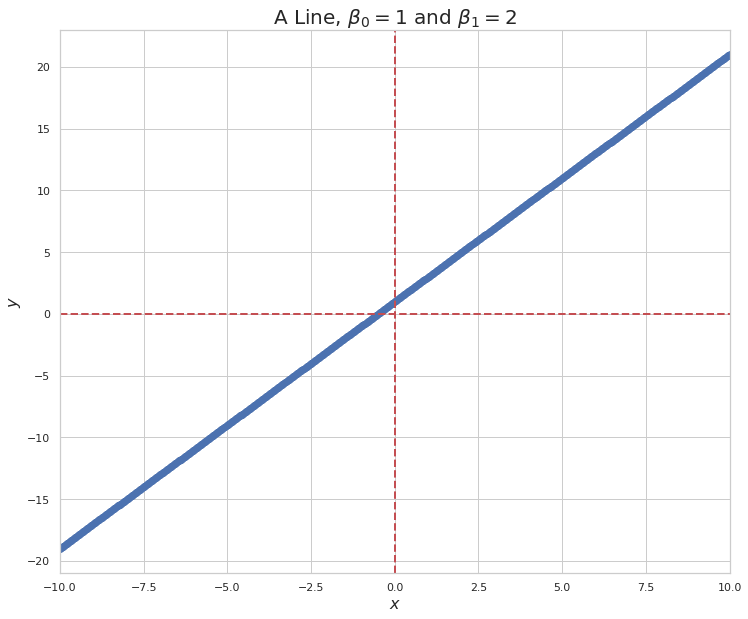

In [18]:
x = linspace(-10, 10, 1000)
y = 1 + 2 * x

plt.figure(figsize = (12, 10))
plt.scatter(x=x, y=y)
plt.xlim(-10,10)
plt.title(r'A Line, $\beta_0=1$ and $\beta_1=2$', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

This line is an abstraction that **allows us to focus**.  We do not expect from any real-world data that every possible pair $(x, y)$ to lie on this line.  Therefore, we summarize our ignorance in a fudge factor, namely:

$y=\beta_0 + \beta_1 \cdot x + \epsilon$

What does the $\epsilon$ capture?

1. It captures the combined effect of other features that we may or may not know.
2. It captures the approximation error (or higher order terms).
3. It captures the purely random component that exists at the level of an individual observation in data (i.e., fundamental unpredictabilty).  

If we have a dataset of size $i=(1,...,N)$, we can write the model as:

$y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$

And this returns us to a scatterplot.

** The scatterplot is all we truly have in applied data science.**

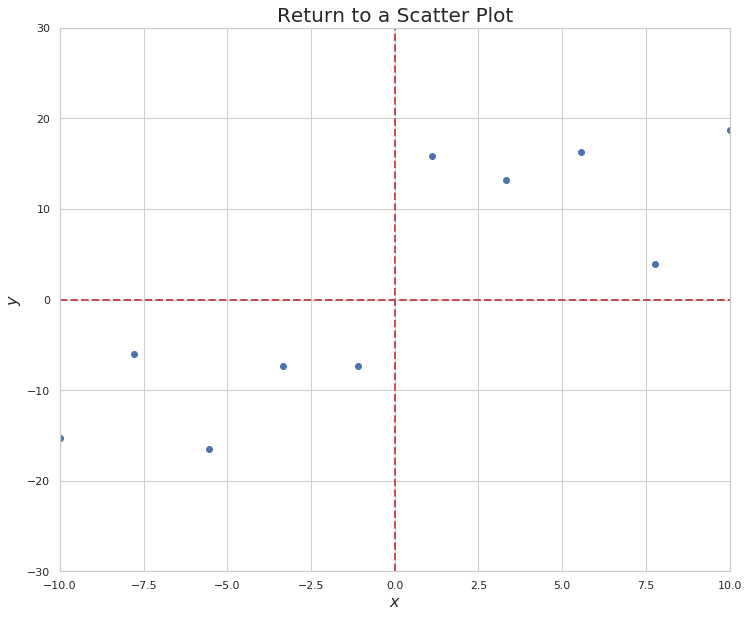

In [23]:
x = linspace(-10, 10, 10)
y = 1 + 2 * x + np.random.normal(0, 10, 10)

plt.figure(figsize = (12, 10))
plt.scatter(x=x, y=y)
plt.xlim(-10,10)
plt.ylim(-30,30)
plt.title(r'Return to a Scatter Plot', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

## Optimization and the Sum of Squared Residuals

Now, in the real world, we start with the data.  Suppose we use a supervised linear model.  How best to fit those data?  We can imbed this into an optimization problem, namely the minimization of a convex surface, applying the principle of least squares.

Denote $\epsilon_i$ to be a residual.  Define the following convex surface, the sum of squared residuals:

$SSR(\beta_0,\beta_1) = \sum_i \epsilon_i^2=\sum_i \left(y_i-\beta_0 - \beta_1 \cdot x_i\right)^2$

The goal is to minimize the SSR with respect to $\beta_0$ and $\beta_1$.  That is, choose $\hat\beta_0$ and $\hat\beta_1$ such that $SSR(\hat\beta_0, \hat\beta_1$) is minimized.

How does this SSR surface appear?

#### Notes
* This is a conceptual SSR surface.
* Increase the first argument in ax.view.init() to provide a different perspective.

Text(0.5,0,'$SSR(\\beta_0, \\beta_1)$')

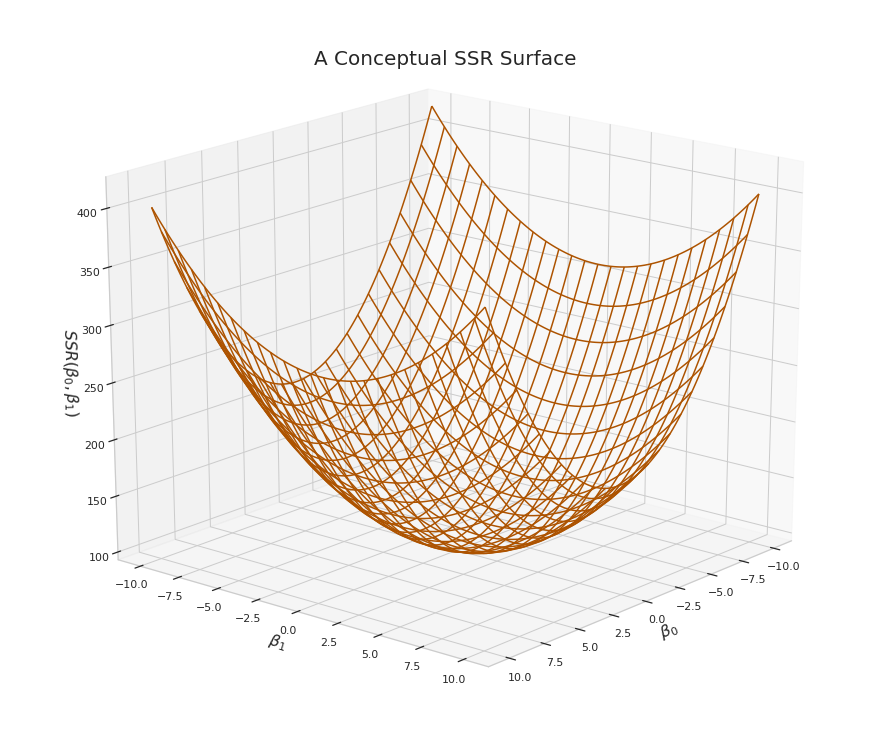

In [20]:
b0 = linspace(-10, 10, 100)
b1 = linspace(-10, 10, 100)
b0, b1 = meshgrid(b0, b1)
rss = -1 * (-2 * b0**2 - b1**2 + b0 + b1 - 100)

fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax.plot_wireframe(b0, b1, rss, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 40)
ax.set_title('A Conceptual SSR Surface', fontsize=20)
ax.set_xlabel(r'$\beta_0$', fontsize = 16)
ax.set_ylabel(r'$\beta_1$', fontsize = 16)
ax.set_zlabel(r'$SSR(\beta_0, \beta_1)$', fontsize = 16)

### Optimization

Let $\overline{x}=\frac{1}{N}\sum_i x_i$ be the sample mean of x and $\overline{y}=\frac{1}{N}\sum_i y_i$ be the sample mean of y.  Some calculus and algebraic manipulation yields the following:

$\hat\beta_1 = \displaystyle{\frac{\sum_i(y_i-\overline{y})(x_i-\overline{x})}{\sum_i(x_i-\overline{x})^2} = \frac{Cov(x,y)}{Var(x)}}$

$\hat\beta_0 = \overline{y} - \hat\beta_1 \cdot \overline{x} \rightarrow \overline{y}=\hat\beta_0 +  \hat\beta_1 \cdot \overline{x}$

### Linear regression (or "least squares") as a minimization problem

#### Notes

* Let's generate some fake data.  
* obs is number of observations.
* params is the number of parameters to be estimated ignoring the constant.  
* It is adjusted to include a constant using statsmodels "add_constant".  

In [24]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.optimize import minimize

In [25]:
obs = 1000
params = 1
random.seed(1898)

params = params + 1
beta = np.random.randn(params, 1)
beta0 = np.zeros((params, 1))
X = np.random.randn(obs, params-1)
X = sm.add_constant(X)
y = np.dot(X, beta) + np.random.randn(obs, 1)

#### Notes
* This is the linear model, $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, to be estimated using least squares by minimization of the SSR. 
* This optimization code should look somewhat familiar.  
* **Focus on the results, not the code.**
* We will use the method of Monte Carlo: generate data from a **known** model and then apply least squares.
* Evaluate how least squares performs against the truth.

In [26]:
def func(b, y, X, obs, params):
    bv = b.view()
    bv.shape = params, 1
    e = y - np.dot(X, bv)
    return np.array(np.sum(e**2))

def func_grad(b, y, X, obs, params):
    bv = b.view()
    bv.shape = params, 1
    foc = -np.sum(X * (y - np.dot(X, bv)), axis=0)
    return np.array(foc)

res = minimize(func, beta0, args=(y, X, obs, params), method='BFGS', 
               jac=func_grad, options={'disp': True, 'maxiter':1000})

Optimization terminated successfully.
         Current function value: 1024.279509
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8


In [27]:
betahat = res.x.reshape((params, 1))
e = y - np.dot(X, betahat)
s2 = np.dot(np.transpose(e), e)/(obs - params)
cov = s2*res.hess_inv

se, t = np.zeros((params, 1)), np.zeros((params, 1))

for i in range(0, params):
    se[i] = np.sqrt(cov[i,i])
    t[i] = res.x[i]/np.sqrt(cov[i,i])

In [28]:
print("The true values are", beta)
print("The fitted values are", betahat)
print("The standard errors are", se)
print("The t-stats are", t)

('The true values are', array([[1.08345078],
       [0.20771998]]))
('The fitted values are', array([[1.05989474],
       [0.23506362]]))
('The standard errors are', array([[0.03204447],
       [0.03198825]]))
('The t-stats are', array([[33.07574334],
       [ 7.34843684]]))


### Minimization Exercise

The Python code above expresses the bivariate model as a minimization problem.  Run the code a few times to demonstrate that the model minimizes without any issues.  For example, increase the sample size.  What happens to the t-statistics as the sample size grows?

### Let's Get Real: Make the Machine Do It!

In [29]:
data = pd.merge(pd.DataFrame(y), pd.DataFrame(X), left_index=True, right_index=True)

mod = smf.ols(formula='y ~ X - 1', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     54.03
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           4.11e-13
Time:                        15:54:50   Log-Likelihood:                -1430.9
No. Observations:                1000   AIC:                             2866.
Df Residuals:                     998   BIC:                             2876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X[0]           1.0599      0.032     33.076      0.0

In [30]:
print("The true values are", beta)
print("The fitted values are", betahat)
print("The standard errors are", se)
print("The t-stats are", t)

('The true values are', array([[1.08345078],
       [0.20771998]]))
('The fitted values are', array([[1.05989474],
       [0.23506362]]))
('The standard errors are', array([[0.03204447],
       [0.03198825]]))
('The t-stats are', array([[33.07574334],
       [ 7.34843684]]))


## An Application: The Capital Asset Pricing Model (CAPM)

CAPM remains one of the workhorse statistical models in finance.  It is so common that sites like Yahoo!Finance report the measures we will estimate statistically.  

**I use CAPM for a reason: absent experimental data, it is the only application of the bivariate linear model that I believe has validity in the real world.**

The upshot of the CAPM says that we can directly interpret the intercept and slope coefficients as real-world measures relating the excess (or risk-adjusted) returns of a particular stock to those of a basket of stocks, such as a specific market.

### CAPM: Regression and Hypothesis Testing

Let $r_i$ denote the rate of return to asset $i$, $r_f$ denote the known rate of return on a risk-free asset (for example, short-term US government debt), and $r_m$ denote the rate of return to a portfolio (or a market) that includes $i$.  

The following equation can be derived:

$E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f)$

Here, $E(\cdot)$ denotes an expected value (because this is a forward-looking prediction).  In CAPM, $\beta$ captures the sensitivity of an asset’s returns to the returns to a portfolio or to the market on which an asset trades.  In other words, it non-diversifiable risk.  In addition, $\alpha$ measures an asset $i$’s excess (or abnormal) returns.

Phrases you may have heard: 

1. The stock's beta is high
2. The hedge fund is chasing alpha

Formally, we can express our conjecture as a joint hypothesis:

$H_0: \alpha = 0, \beta=1$

$H_1: \text{ not }H_0$

### Let's Look at the Obvious: Teaching in a Sea of These

#### Notes
* This used to be easy until the death of the Yahoo!Finance API.
* pip install fix_yahoo_finance

In [1]:
from PIL import Image
import urllib.request as url
import io

fd = url.urlopen("http://buzzmybiz.co/wp-content/uploads/2012/06/apple-logo.jpg")
image_file = io.BytesIO(fd.read())
Image.open(image_file)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime as dt  
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.simplefilter('ignore')
import fix_yahoo_finance as yf

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Grab Apple and NASDAQ data.  

start, end = "2006-01-01", "2016-12-31"

aapl_all = yf.download('aapl', start=start, end=end)
nasdaq_all = yf.download('^ixic', start=start, end=end)
aapl = aapl_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Text(0.5,1,'AAPL ($/Share)')

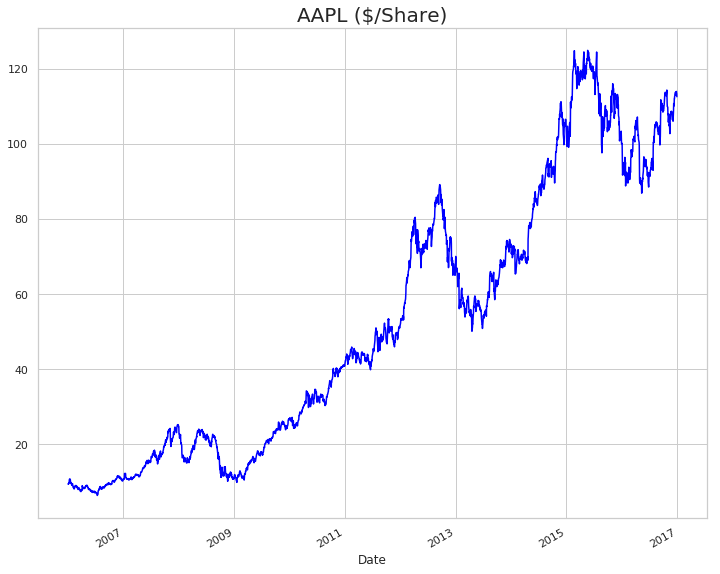

In [3]:
plt.figure(figsize=(12, 10))
aapl.plot(color='blue')
plt.title('AAPL ($/Share)', fontsize=20)

Text(0.5,1,'NASDAQ')

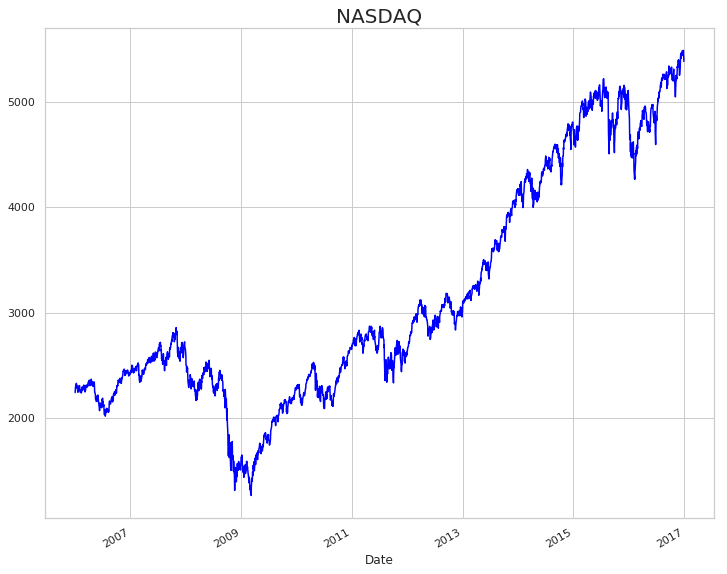

In [4]:
plt.figure(figsize = (12, 10))
nasdaq.plot(color='blue')
plt.title('NASDAQ', fontsize=20)

In [5]:
# Calculate log returns, which is the standard finance measure for daily returns in finance.

aapl_returns = (np.log(aapl / aapl.shift(1))).dropna()
nasdaq_returns = (np.log(nasdaq / nasdaq.shift(1))).dropna()

In [6]:
print("Average daily AAPL returns and 'risk' are %f and %f" % (aapl_returns.mean(), aapl_returns.std()))

Average daily AAPL returns and 'risk' are 0.000895 and 0.021082


(0, 60)

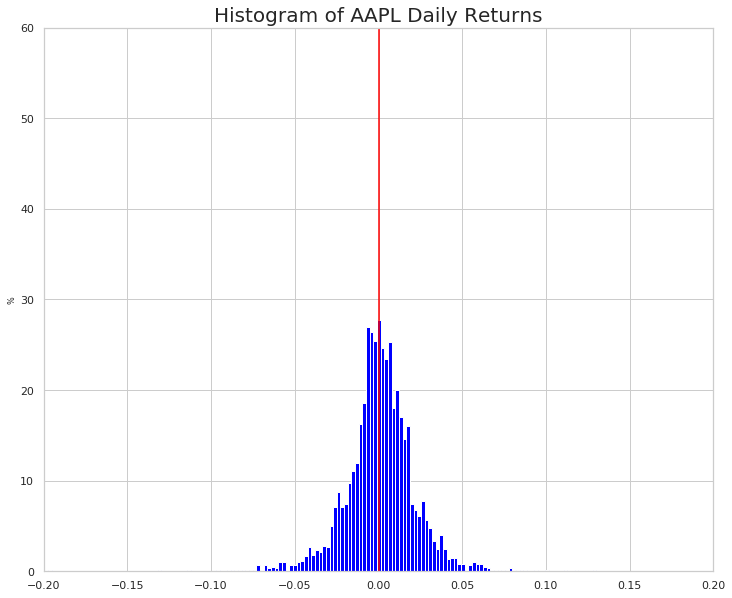

In [7]:
plt.figure(figsize=(12, 10))
plt.hist(aapl_returns, bins=150, density=True, color='blue')
plt.title('Histogram of AAPL Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

In [8]:
print("Average daily market returns and 'risk' are %f and %f" % (nasdaq_returns.mean(), nasdaq_returns.std()))

Average daily market returns and 'risk' are 0.000316 and 0.013625


(0, 60)

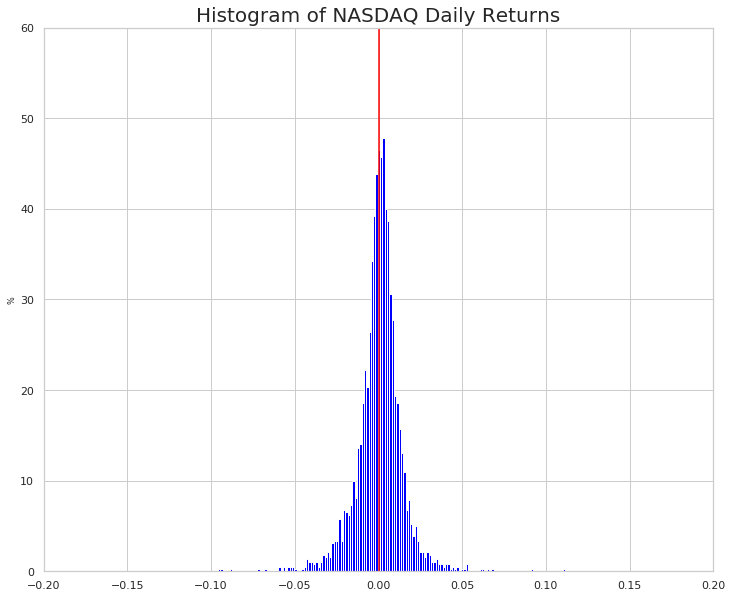

In [9]:
plt.figure(figsize=(12, 10))
plt.hist(nasdaq_returns, bins=150, density=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

In [10]:
aapl_returns = pd.DataFrame(aapl_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

(-0.1, 0.1)

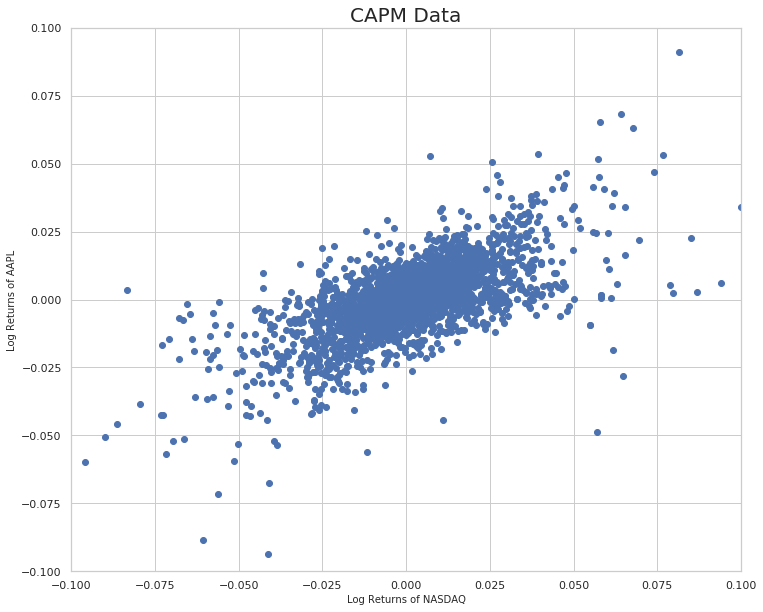

In [11]:
plt.figure(figsize = (12, 10))
plt.scatter(aapl_returns, nasdaq_returns, c='b')
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 10)
plt.ylabel('Log Returns of AAPL', fontsize = 10)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

#### Notes
* Merge and rename.
* We create two dataframes using Pandas.
* We then merge the two dataframes using the indexes associated with each frame.  
* You will be able to use this code repeatedly.

In [12]:
aapl_r = pd.DataFrame(aapl_returns)
nasdaq_r = pd.DataFrame(nasdaq_returns)
data = pd.merge(nasdaq_r, aapl_r, left_index=True, right_index=True)
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'aapl'}, inplace=True)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2114.
Date:                Mon, 17 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:37:44   Log-Likelihood:                 7541.1
No. Observations:                2768   AIC:                        -1.508e+04
Df Residuals:                    2766   BIC:                        -1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.898      0.0

(-0.1, 0.1)

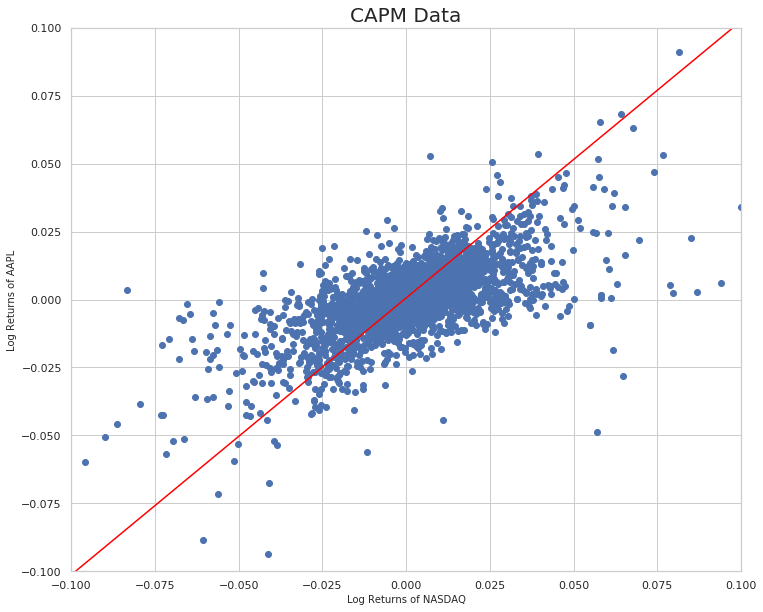

In [13]:
figure, ax = plt.subplots(figsize=(12 ,10))
ax.scatter(aapl_returns, nasdaq_returns, c="b")
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of AAPL', fontsize = 10)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 10)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

### CAPM Exercise 2

#### Let's find another tech stock.

In [ ]:
start, end = "2008-08-31", "2018-08-31"

goog_all = yf.download('goog', start=start, end=end)
nasdaq_all = yf.download('^ixic', start=start, end=end)
goog = goog_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

In [ ]:
plt.figure(figsize=(12, 10))
goog.plot(color='blue')
plt.title('GOOG ($/Share)', fontsize=20)

In [ ]:
plt.figure(figsize = (12, 10))
nasdaq.plot(color='blue')
plt.title('NASDAQ', fontsize=20)

In [ ]:
goog_returns = (np.log(goog / goog.shift(1))).dropna()
nasdaq_returns = (np.log(nasdaq / nasdaq.shift(1))).dropna()

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(goog_returns, bins=150, density=True, color='b')
plt.title('Histogram of GOOG Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(nasdaq_returns, bins=150, density=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

In [ ]:
goog_returns = pd.DataFrame(goog_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

plt.figure(figsize = (12, 10))
plt.scatter(goog_returns, nasdaq_returns, c='b')
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 10)
plt.ylabel('Log Returns of GOOG', fontsize = 10)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

In [ ]:
data = pd.merge(nasdaq_returns, goog_returns, left_index=True, right_index=True)
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'goog'}, inplace=True)
mod = smf.ols(formula='goog ~ nasdaq', data = data).fit()
print(mod.summary())

In [ ]:
figure, ax = plt.subplots(figsize=(12 ,10))
ax.scatter(goog_returns, nasdaq_returns, c="b")
mod = smf.ols(formula='goog ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of GOOG', fontsize = 10)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 10)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

### Train/Test Splits and (Out-of-Sample) Prediction

* The discussion above is focused on a traditional approach to supervised learning: use all of the data.
* Now we will focus on splitting our data into a training set and a test set.  
* We do not let the algorithm see the test set.
* We use the test set to evaluate the performance of the trained algorithm.
* Mean squared error: $\sum \{\hat{y} - y\}^2$ over test set and average.
* Mean squared forecast error in time series.

In [ ]:
# We already have the Google CAPM data loaded, so let's us it.

data.head()

#### Train/Test Split

* I used to teach how to do this 'by hand'.  
* Conceptually straightforward.  
* Suppose I wanted to split **randomly** a dataset of size $N$ into a training set of $0.80\cdot N \text{ and }0.02\cdot  N$.
* Use a weighted coin.
* Now can use another library, Scikit Learning, a Python machine learning libary.
* train_test_split is the object that splits the data.

In [ ]:
# Use Python instead.

from sklearn.model_selection import train_test_split

In [ ]:
datatrain, datatest = train_test_split(data, test_size = 0.2, random_state = 6281993)

In [ ]:
data.describe()

In [ ]:
datatrain.describe()

In [ ]:
datatest.describe()

In [ ]:
# Train the linear model on the training set.  Created fitted values on the test set.

mod = smf.ols(formula='goog ~ nasdaq', data = datatrain).fit()
datatest['fitted'] = mod.predict(exog = datatest)

In [ ]:
# The baseline against which to measure.

print('The average in-sample GOOG return is %f' % datatrain['goog'].mean())
print('The average out-sample GOOG return is %f' % datatest['goog'].mean())
print('The average predicted GOOG return is %f' % datatest['fitted'].mean())
print('The MSE is %f' % ((datatest['goog'] - datatest['fitted'])**2).mean())

In [ ]:
figure, ax = plt.subplots(figsize=(12 ,10))
ax.scatter(datatest['goog'], datatest['nasdaq'], c="b")
mod = smf.ols(formula='goog ~ nasdaq', data = datatrain).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('Out of Sample Performance', fontsize = 20)
ax.set_ylabel('Log Returns of GOOG', fontsize = 10)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 10)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

### Discussion

#### In this use case, what does the red line represent?
#### In this use case, what do points above the red line represent?
#### In this use case, what do points below the red line represent?

## We Will Return to All of These Concepts for both Bayesian Inference and Deep Learning